### This notebook will estimate excess deaths (of all causes) in 2020 based on mortality data downloaded from the CDC

In [1]:
from pandas_ods_reader import read_ods
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

In [2]:
# Import 1999-2019 death data of all causes by state (initially queried from CDC Wonder site: https://wonder.cdc.gov/)
deaths_old = read_ods('US_Deaths_1999-June2021.ods', sheet='1999-2019')

# Drop rows with no state code (this is due to the file having yearly totals included)
deaths_old.dropna(axis=0, how='any', inplace=True)

In [3]:
# Cast data types for year state code to integer then look at data
deaths_old['Year'] = deaths_old['Year'].astype(dtype='int')
deaths_old['State Code'] = deaths_old['State Code'].astype(dtype='int')
deaths_old.head()

,Year,State,State Code,Deaths,Population,Rate
0,1999,Alabama,1,44806.0,4430141.0,1011.4
1,1999,Alaska,2,2708.0,624779.0,433.4
2,1999,Arizona,4,40050.0,5023823.0,797.2
3,1999,Arkansas,5,27925.0,2651860.0,1053.0
4,1999,California,6,229380.0,33499204.0,684.7


In [4]:
# Summary death data for 2020 and 2021 were downloaded by state/month from CDC provisional tables (https://www.cdc.gov/nchs/nvss/vsrr/provisional-tables.htm)
# (2021 data is only available through June)
deaths_2020 = read_ods('US_Deaths_1999-June2021.ods', sheet='2020')
deaths_2021 = read_ods('US_Deaths_1999-June2021.ods', sheet='2021')

# Change case of states to match the data set above ('title' case)
deaths_2020['State'] = [x.title() for x in deaths_2020['State']]
deaths_2021['State'] = [x.title() for x in deaths_2021['State']]

# Set states to the index for the dataframe
deaths_2020.set_index('State', inplace=True)
deaths_2021.set_index('State', inplace=True)

In [5]:
# 2020 Data Preview
pd.options.display.float_format = '{:,.0f}'.format
deaths_2020.head()

,January,February,March,April,May,June,July,August,September,October,November,December
State,,,,,,,,,,,,
Alabama,"4,820","4,716","4,848","4,971","5,206","4,995","5,827","5,876","5,208","5,299","5,655","7,160"
Alaska,435,374,367,368,398,381,445,441,436,479,514,523
Arizona,"5,774","5,389","5,860","5,807","5,856","6,467","8,283","6,630","5,360","5,542","6,066","9,109"
Arkansas,"2,988","2,868","2,909","2,744","2,824","2,968","3,144","3,367","3,267","3,535","3,794","4,215"
California,"25,651","23,726","25,015","25,515","24,836","23,889","27,258","27,419","24,387","24,434","26,415","40,923"


In [6]:
# 2021 Data Preview
deaths_2021.head()

,January,February,March,April,May,June
State,,,,,,
Alabama,"7,942","5,642","5,150","5,038","4,967","4,715"
Alaska,481,371,412,344,398,381
Arizona,"10,185","6,624","6,077","5,447","5,712","5,668"
Arkansas,"4,270","3,287","3,106","2,822","3,037","2,905"
California,"47,902","29,878","26,609","23,080","23,305","22,453"


In [7]:
# Group historical data (1999-2019) by state and year
deaths_grp = deaths_old.groupby(['State', 'Year']).agg({'Deaths':sum}).unstack(level=-1)
deaths_grp.reset_index(inplace=True)
deaths_grp.set_index('State', inplace=True)
deaths_grp.columns = [str(x) for x in deaths_grp.columns.droplevel()]
deaths_grp.head()

,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
State,,,,,,,,,,,,,,,,,,,,,
Alabama,"44,806","45,062","45,316","46,069","46,716","46,121","47,090","46,977","46,696","47,707",...,"48,038","48,681","49,301","50,189","50,215","51,909","52,466","53,238","54,352","54,108"
Alaska,"2,708","2,914","2,974","3,030","3,180","3,051","3,168","3,354","3,463","3,494",...,"3,728","3,849","3,912","3,997","4,128","4,316","4,494","4,411","4,453","4,613"
Arizona,"40,050","40,500","41,058","42,816","43,392","43,198","45,827","46,365","45,554","45,823",...,"46,762","48,381","49,549","50,534","51,538","54,299","56,645","57,758","59,282","60,236"
Arkansas,"27,925","28,217","27,759","28,513","27,918","27,528","28,055","27,901","28,191","29,322",...,"28,916","29,653","30,117","30,437","30,467","31,617","31,756","32,588","32,336","32,888"
California,"229,380","229,551","234,044","234,565","239,371","232,525","237,037","237,126","233,720","234,766",...,"234,012","239,942","242,554","248,359","245,929","259,206","262,240","268,189","268,818","269,831"


In [8]:
# Append 2020 and 2021 data and write summary to separate file
deaths_grp['2020'] = deaths_2020.sum(axis=1)
deaths_grp['Jun-2021'] = deaths_2021.sum(axis=1)
deaths_grp.to_csv('US Deaths by Year 1999-June 2021.csv', index=False)
deaths_grp.head()

,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Jun-2021
State,,,,,,,,,,,,,,,,,,,,,
Alabama,"44,806","45,062","45,316","46,069","46,716","46,121","47,090","46,977","46,696","47,707",...,"49,301","50,189","50,215","51,909","52,466","53,238","54,352","54,108","64,581","33,454"
Alaska,"2,708","2,914","2,974","3,030","3,180","3,051","3,168","3,354","3,463","3,494",...,"3,912","3,997","4,128","4,316","4,494","4,411","4,453","4,613","5,161","2,387"
Arizona,"40,050","40,500","41,058","42,816","43,392","43,198","45,827","46,365","45,554","45,823",...,"49,549","50,534","51,538","54,299","56,645","57,758","59,282","60,236","76,143","39,713"
Arkansas,"27,925","28,217","27,759","28,513","27,918","27,528","28,055","27,901","28,191","29,322",...,"30,117","30,437","30,467","31,617","31,756","32,588","32,336","32,888","38,623","19,427"
California,"229,380","229,551","234,044","234,565","239,371","232,525","237,037","237,126","233,720","234,766",...,"242,554","248,359","245,929","259,206","262,240","268,189","268,818","269,831","319,468","173,227"


In [32]:
# Take a look at total deaths and % increase year over year for 1999-2020 (2021 data is incomplete)
d = {'Total Deaths':deaths_grp.sum(), 'Percent Change':100*deaths_grp.sum().pct_change()}
death_sum = pd.DataFrame(data=d)
death_sum['Percent Change'] = pd.to_numeric(death_sum['Percent Change'])
# death_sum.fillna('-', inplace=True)
death_sum[:-1].style.format({'Total Deaths':'{:,.0f}', 'Percent Change':'{:.1f} %'})

,Total Deaths,Percent Change
1999,"2,391,399",nan %
2000,"2,403,351",0.5 %
2001,"2,416,425",0.5 %
2002,"2,443,387",1.1 %
2003,"2,448,288",0.2 %
2004,"2,397,615",-2.1 %
2005,"2,448,017",2.1 %
2006,"2,426,264",-0.9 %
2007,"2,423,712",-0.1 %
2008,"2,471,984",2.0 %


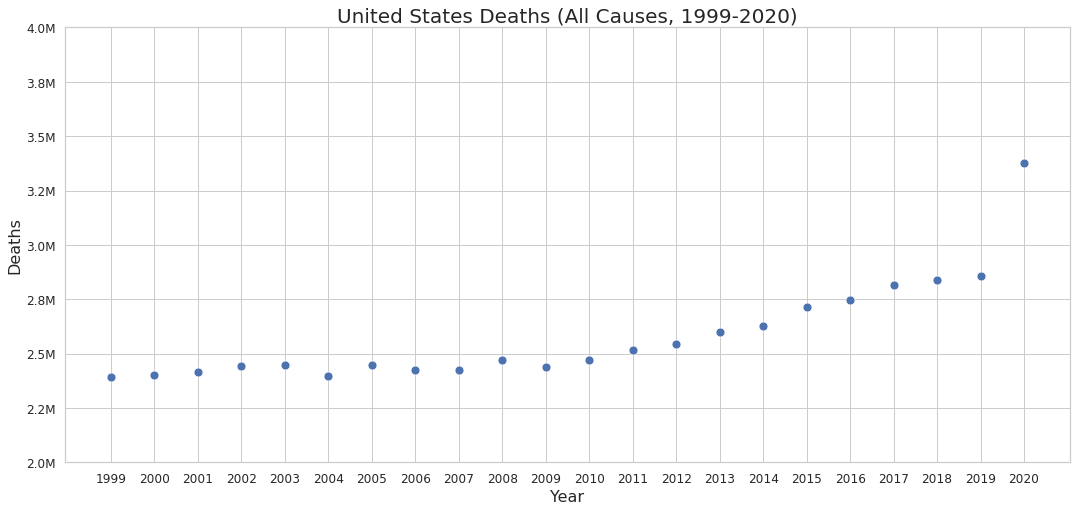

In [33]:
# Plot data 1999-2020
sns.set(rc = {'figure.figsize':(18,8)})
sns.set_theme(style='whitegrid', palette='rocket', font_scale=1.1)
g = sns.scatterplot(x=deaths_grp.sum().index[:-1], y=deaths_grp.sum()[:-1], s=80, color='b')
_ = g.set_ylim([2e6, 4e6])
ylabels = ['{:,.1f}'.format(x) + 'M' for x in g.get_yticks()/1e6]
ticks_loc = g.get_yticks().tolist()
_ = g.yaxis.set_major_locator(mtick.FixedLocator(ticks_loc))
_ = g.set_yticklabels(ylabels)
g.set_xlabel('Year', fontsize=16)
g.set_ylabel('Deaths', fontsize=16)
_ = g.set_title('United States Deaths (All Causes, 1999-2020)', fontsize=20)

In [61]:
# Get the maximum and average % change in US deaths from 1999-2019
max_change = death_sum['Percent Change'][1:-2].max()
mean_change = death_sum['Percent Change'][1:-2].mean()
print(f"Maximum Yearly % Change in US Deaths 1999-2019: {max_change:.2f}%")
print(f"Average Yearly % Change in US Deaths 1999-2019: {mean_change:.2f}%")

Maximum Yearly % Change in US Deaths 1999-2019: 3.28%
Average Yearly % Change in US Deaths 1999-2019: 0.90%


In [62]:
# Set conservative lower bound on excess deaths --- assume 2020 deaths should have been 3.28% higher than 2019
excess_conservative = death_sum.loc['2020']['Total Deaths'] - 1.0328*death_sum.loc['2019']['Total Deaths']

# Set average bound on excess deaths --- assume 2020 deaths should have been 0.9% higher than 2019
excess_mean = death_sum.loc['2020']['Total Deaths'] - 1.009*death_sum.loc['2019']['Total Deaths']
print(f"Conservative Excess Deaths: {excess_conservative:,.0f}")
print(f"Mean Excess Deaths: {excess_mean:,.0f}")

Conservative Excess Deaths: 427,818
Mean Excess Deaths: 495,763
